In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


In [4]:

dataset.drop(['sl_no'], axis=1, inplace=True)

In [5]:

dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


# Label Encoding Data

In [7]:

features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)


In [8]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,270000,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,204000,0,1,0,1,0,0


In [9]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,270000,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,204000,0,1,0,1,0,0


In [11]:
encoder = LabelEncoder() 

In [12]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])


In [13]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000,0,1,0,1,0,0


In [14]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,197493.023256,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,155314.539756,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,240000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for Outliers

IndexError: index 10 is out of bounds for axis 0 with size 10

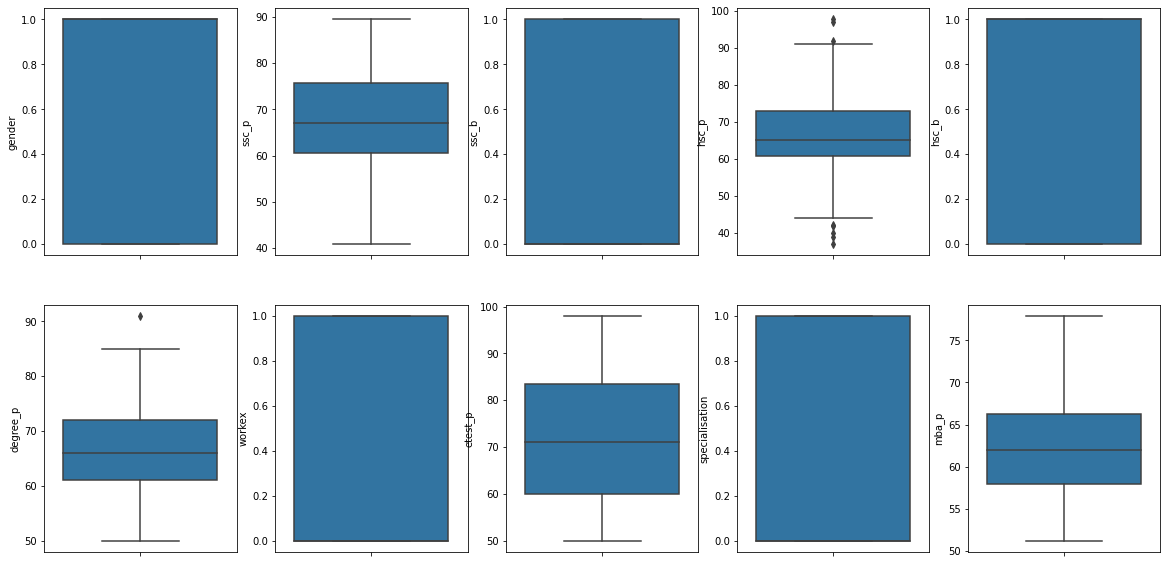

In [15]:
fig, axs = plt.subplots(ncols=5,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) 

In [ ]:
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

# Checking for Correlation

In [ ]:
dataset.corr()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

Correlation between the features are atmost 0.9 so they are not multi-correlated

In [ ]:
dataset.shape

In [ ]:
fig, axs = plt.subplots(ncols=7,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [ ]:
x = dataset.loc[:,dataset.columns!='status'] # all features are used
x = x.drop('salary', axis=1)
y = dataset.loc[:, 'status'] # label is status of placement


In [ ]:
x

In [ ]:
y

In [ ]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) 
x_scaled = pd.DataFrame(x_scaled)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

# Using Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
lr.score(x_train,y_train)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

# Using Naive Bayes Classifier - Gaussian Naive Bayes

In [ ]:
nbclassifier = GaussianNB()

In [ ]:
nbclassifier.fit(x_train, y_train)

In [ ]:
y_pred_nb = nbclassifier.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_nb)

In [ ]:
nbclassifier.score(x_train, y_train)

In [ ]:
confusion_matrix(y_test, y_pred_nb)

In [ ]:
print(classification_report(y_test,y_pred_nb))

# Using SVM Linear Kernel

In [ ]:
clf = svm.SVC(kernel="linear")

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred_svm = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_svm)

In [ ]:
clf.score(x_train, y_train)

In [ ]:
confusion_matrix(y_test, y_pred_svm)

In [ ]:
print(classification_report(y_test, y_pred_svm))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:

dataset.dropna(inplace=True)
dataset.drop("status", axis=1, inplace=True)

In [ ]:
dataset.head()

In [ ]:

y = dataset["salary"]
X = dataset.drop("salary", axis=1)
column_names = X.columns.values

In [ ]:

X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:

sns.kdeplot(y)
plt.show()

In [ ]:

y[y > 400000]


In [ ]:

X_scaled = X_scaled[y < 400000]
y = y[y < 400000]

In [ ]:

sns.kdeplot(y)
plt.show()

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
linreg = LinearRegression()
sfs = SFS(linreg, k_features=1, forward=False, scoring='r2',cv=10)
sfs = sfs.fit(X_scaled, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()


In [ ]:

top_n = 5
sfs.get_metric_dict()[top_n]

In [ ]:

top_n_indices = list(sfs.get_metric_dict()[top_n]['feature_idx'])
print(f"Most Significant {top_n} Features:")
for col in column_names[top_n_indices]:
    print(col)

In [ ]:

X_selected = X_scaled[: ,top_n_indices]
lin_reg = LinearRegression()
lin_reg.fit(X_selected, y)
y_pred = lin_reg.predict(X_selected)
print(f"R2 Score: {r2_score(y, y_pred)}")
print(f"MAE: {mean_absolute_error(y, y_pred)}")

In [ ]:
y_pred

In [ ]:
y